In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,ElasticNet
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree
from sklearn.ensemble import BaggingClassifier,StackingClassifier,RandomForestClassifier,
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,minmax_scale

import warnings
warnings.filterwarnings("ignore")

le = LabelEncoder()
ohe = OneHotEncoder()
sc = StandardScaler()

rfc =  RandomForestClassifier(n_estimators=100)
rfr = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()
lgr = LogisticRegression()
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
svrc = svm.SVR()
lasso = Lasso()
bagc = BaggingClassifier()

models = [rfc,lr,lgr,gnb,mnb,dtc,svrc,lasso,bagc]

In [2]:
df = pd.read_csv('train.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,26,technician,married,secondary,no,289,no,no,cellular,8,jul,102,3,-1,0,unknown,1
20996,34,management,married,tertiary,no,122,yes,no,cellular,19,may,301,2,-1,0,unknown,0
20997,32,blue-collar,married,tertiary,yes,521,no,yes,telephone,2,oct,140,3,-1,0,unknown,0
20998,40,technician,married,secondary,no,2092,no,no,cellular,3,aug,7,2,-1,0,unknown,0


In [3]:
df.nunique()

age            68
job            12
marital         3
education       4
default         2
balance      5587
housing         2
loan            2
contact         3
day            31
month          12
duration     1456
campaign       26
pdays         236
previous       15
poutcome        4
y_bool          2
dtype: int64

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y_bool       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        21000 non-null  int64 
 1   job        21000 non-null  object
 2   marital    21000 non-null  object
 3   education  21000 non-null  object
 4   default    21000 non-null  object
 5   balance    21000 non-null  int64 
 6   housing    21000 non-null  object
 7   loan       21000 non-null  object
 8   contact    21000 non-null  object
 9   day        21000 non-null  int64 
 10  month      21000 non-null  object
 11  duration   21000 non-null  int64 
 12  campaign   21000 non-null  int64 
 13  pdays      21000 non-null  int64 
 14  previous   21000 non-null  int64 
 15  poutcome   21000 non-null  object
 16  y_bool     21000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


In [6]:
print(df['y_bool'].value_counts())
print(5651/15349)

0    15349
1     5651
Name: y_bool, dtype: int64
0.36816730731643754


In [7]:
df['job'].value_counts()

blue-collar      4947
technician       4484
management       3850
admin.           3272
services         1740
retired          1022
self-employed     532
entrepreneur      335
unemployed        246
student           205
unknown           199
housemaid         168
Name: job, dtype: int64

In [8]:
df['marital'].value_counts()

married     13412
single       3875
divorced     3713
Name: marital, dtype: int64

In [9]:
df['contact'].value_counts() #drop

cellular     13172
unknown       6334
telephone     1494
Name: contact, dtype: int64

In [10]:
df['education'].value_counts()

secondary    10663
tertiary      6990
primary       2237
unknown       1110
Name: education, dtype: int64

In [11]:
df['poutcome'].value_counts().sort_index()

failure     3818
other        670
success      387
unknown    16125
Name: poutcome, dtype: int64

In [12]:
df['previous'].value_counts()

0     20133
1       407
2       193
3        80
4        58
5        39
6        37
7        16
8        10
9         9
10        8
11        5
12        3
14        1
13        1
Name: previous, dtype: int64

In [13]:
df['campaign'].value_counts().sort_index()

1     7694
2     9837
3     2069
4      638
5      211
6      148
7      128
8       64
9       30
10      37
11      25
12      15
13      21
14      12
15      18
16      12
17       9
18       7
19       9
20       5
21       5
22       1
23       1
25       2
27       1
28       1
Name: campaign, dtype: int64

In [14]:
# sns.pairplot(df,hue='y_bool')

<img src='download_hue.png'/>

<AxesSubplot:xlabel='job', ylabel='count'>

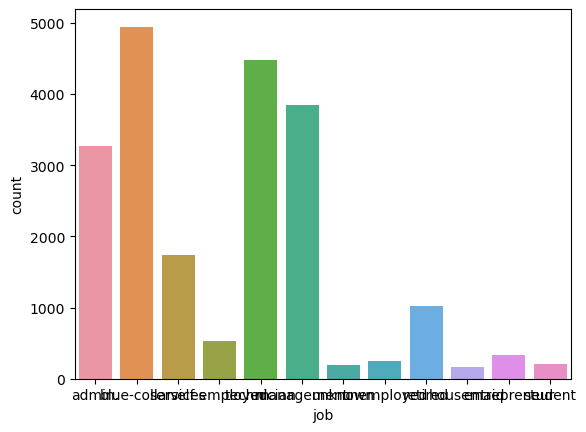

In [15]:
sns.countplot('job',data=df,orient='v')

In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_bool
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,36.997952,1607.497810,11.056571,264.085048,2.013381,3.231952,0.102524,0.269095
std,10.484725,2991.187132,7.450415,288.163812,1.575916,23.161489,0.664355,0.443500
min,19.000000,-2072.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,29.000000,299.000000,5.000000,94.000000,1.000000,-1.000000,0.000000,0.000000
50%,35.000000,633.000000,10.000000,184.000000,2.000000,-1.000000,0.000000,0.000000
75%,45.000000,1875.000000,16.000000,319.000000,2.000000,-1.000000,0.000000,1.000000
max,87.000000,71188.000000,31.000000,2703.000000,28.000000,437.000000,14.000000,1.000000


In [17]:
df_1 = df[df['y_bool']==1]
print(df_1.shape)
df_2 = df[df['y_bool']==0]
print(df_2.shape)

(5651, 17)
(15349, 17)


<AxesSubplot:xlabel='job', ylabel='count'>

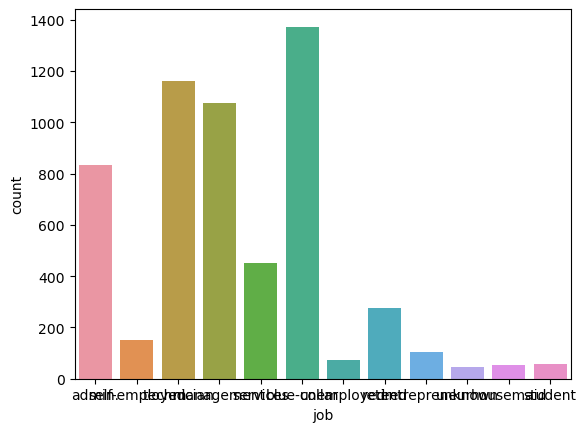

In [18]:
sns.countplot('job',data=df_1,orient='v')

In [19]:
drop_c = ['contact','pdays','month','day','duration','previous']
df.drop(drop_c,axis='columns',inplace=True)
df.job.replace({'blue-collar':1,'technician':2,'management':3,'admin.':4,'services':5,'retired':6,'self-employed':7,
    'entrepreneur':8,'unemployed':9,'student':10,'unknown':11,'housemaid':12},inplace=True)
df.marital.replace({'married':1,'single':4,'divorced':3},inplace=True)
df.education.replace({'secondary':1,'tertiary':2,'primary':3,'unknown':4},inplace=True)
df.default.replace({'yes':1,'no':0},inplace=True)
df.housing.replace({'yes':1,'no':0},inplace=True)
df.loan.replace({'yes':1,'no':0},inplace=True)
df.poutcome.replace({'failure':0,'other':2,'success':1,'unknown':2},inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,campaign,poutcome,y_bool
0,51,4,1,2,0,148,0,0,2,2,0
1,55,1,1,1,0,7160,1,0,1,2,0
2,65,1,3,2,0,2197,1,0,2,2,0
3,25,4,1,1,0,6658,1,0,1,2,1
4,36,5,1,1,0,1761,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20995,26,2,1,1,0,289,0,0,3,2,1
20996,34,3,1,2,0,122,1,0,2,2,0
20997,32,1,1,2,1,521,0,1,3,2,0
20998,40,2,1,1,0,2092,0,0,2,2,0


In [20]:
# dumm = pd.get_dummies(df['job'])
# dumm

In [21]:
#data = pd.concat([df,dumm],axis=1)
data = df.copy()

In [22]:
# data.drop('job',axis=1,inplace=True)

In [23]:
# # marital education default housing loan previous poutcome
# data.marital.astype('category')
# data.education.astype('category')
# data.default.astype('category')
# data.housing.astype('category')
# data.loan.astype('category')
# data.previous.astype('category')
# data.poutcome.astype('category')
data.astype({'marital':'category','education':'category','default':'category',
             'housing':'category','loan':'category','poutcome':'category','job':'category'},)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        21000 non-null  int64
 1   job        21000 non-null  int64
 2   marital    21000 non-null  int64
 3   education  21000 non-null  int64
 4   default    21000 non-null  int64
 5   balance    21000 non-null  int64
 6   housing    21000 non-null  int64
 7   loan       21000 non-null  int64
 8   campaign   21000 non-null  int64
 9   poutcome   21000 non-null  int64
 10  y_bool     21000 non-null  int64
dtypes: int64(11)
memory usage: 1.8 MB


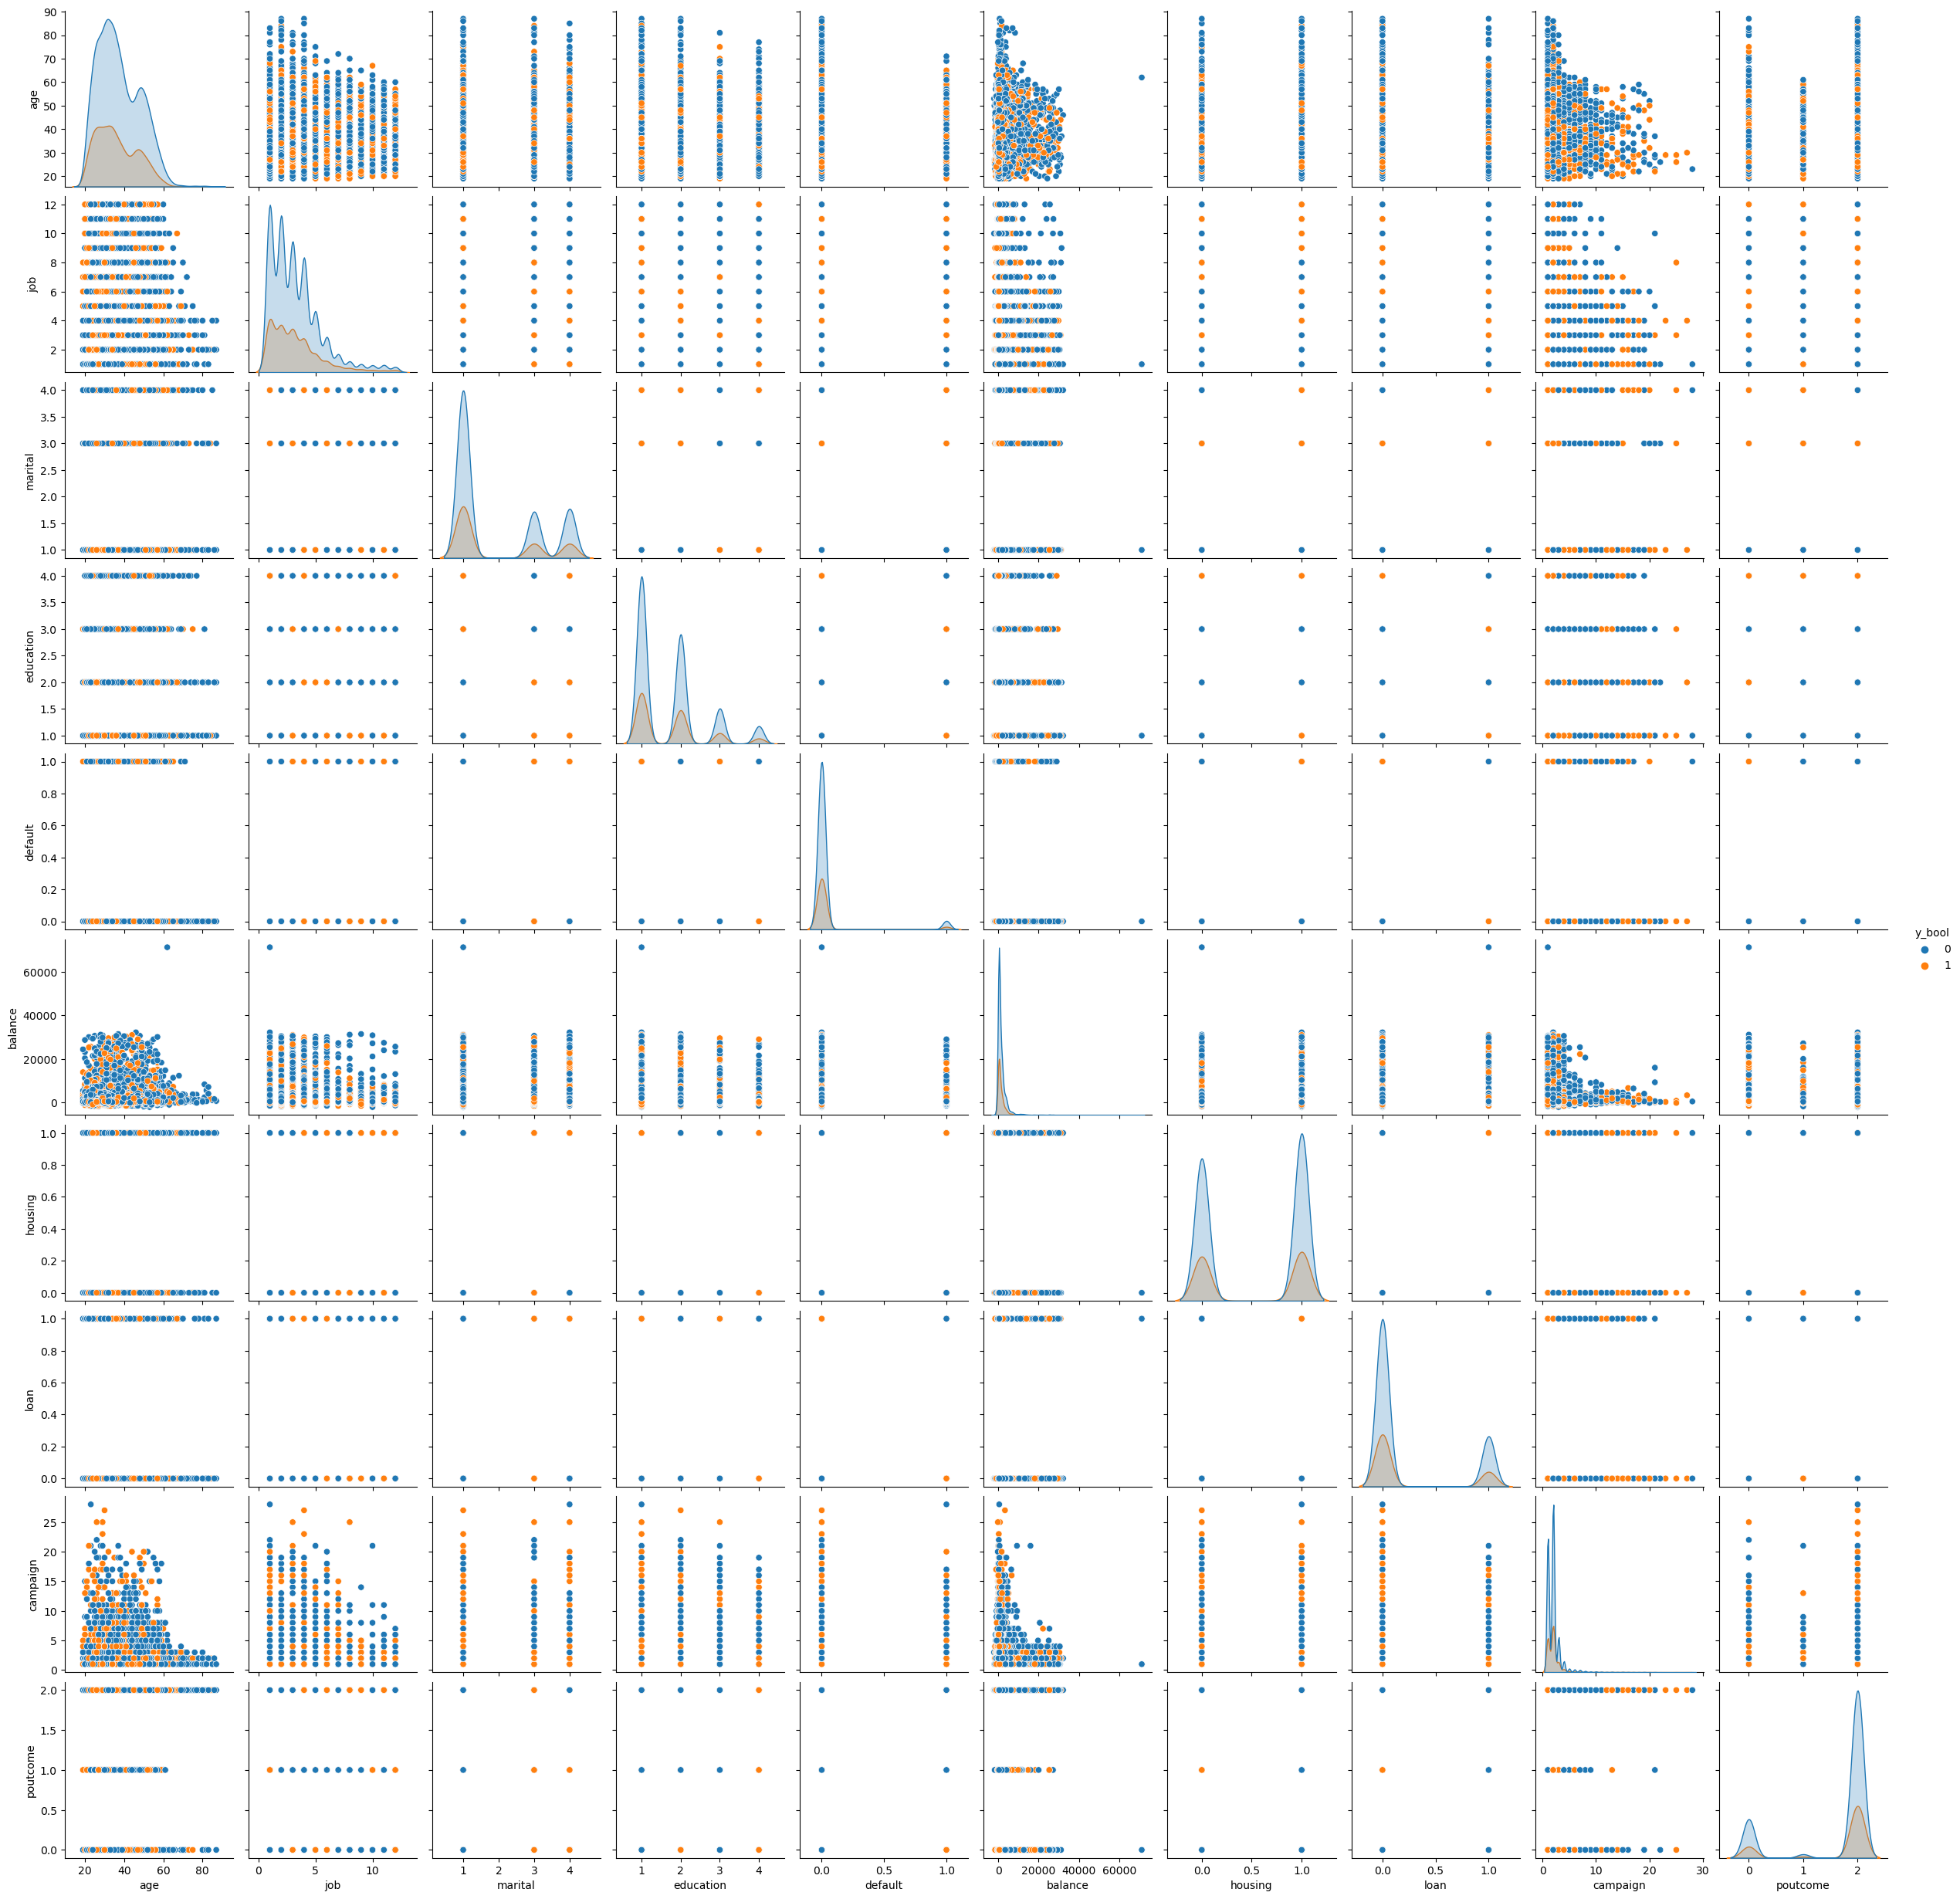

In [24]:
# sns.pairplot(data,hue='y_bool')
<img src='download_all.png'/>

In [28]:
x = data.drop('y_bool',axis=1)
y = data.y_bool

In [29]:
x

,age,job,marital,education,default,balance,housing,loan,campaign,poutcome
0,51,4,1,2,0,148,0,0,2,2
1,55,1,1,1,0,7160,1,0,1,2
2,65,1,3,2,0,2197,1,0,2,2
3,25,4,1,1,0,6658,1,0,1,2
4,36,5,1,1,0,1761,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
20995,26,2,1,1,0,289,0,0,3,2
20996,34,3,1,2,0,122,1,0,2,2
20997,32,1,1,2,1,521,0,1,3,2
20998,40,2,1,1,0,2092,0,0,2,2


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
print(len(x_train))
print(len(x_test))

15750
5250


In [59]:
x_test[:10]

,age,job,marital,education,default,balance,housing,loan,campaign,poutcome
2357,30,4,1,2,0,3708,0,0,2,2
18050,53,4,4,1,0,285,1,0,2,2
664,25,1,4,1,0,5530,1,1,1,2
1439,31,3,1,1,0,1680,1,0,1,2
9443,35,5,4,2,0,1474,0,0,3,2
10403,20,1,4,1,1,1047,0,0,2,2
15819,25,4,3,1,0,430,0,0,2,2
14298,36,2,1,1,0,169,0,0,2,0
15354,58,1,3,1,0,2427,0,0,1,2
12148,50,5,1,3,0,675,1,0,2,0


In [102]:
y_test[:10]

13562    0
19334    0
20488    0
14937    1
7249     0
2068     1
16651    0
1222     0
5997     0
4302     0
Name: y_bool, dtype: int64

In [91]:
algo = RandomForestClassifier(n_estimators=100)
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])
# 0.7183333333333334 for random forest classifier

0.7146666666666667


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
algo = DecisionTreeClassifier()
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])

# 0.595 == 0.6 for DecisionTreeClassifier

0.5982857142857143


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [79]:
algo = GaussianNB()
algo.fit(x,y)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])
# 0.7183333333333334 for gnb

0.7377142857142858


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
from sklearn.tree import ExtraTreeClassifier
algo = ExtraTreeClassifier()
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])

0.6232380952380953


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [83]:
from sklearn.ensemble import AdaBoostClassifier 
algo = AdaBoostClassifier()
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])

0.7460952380952381


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
from sklearn.ensemble import GradientBoostingClassifier 
algo = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
algo.fit(x_train,y_train)
print(algo.score(x_test,y_test))
algo.predict(x_test[0:10])

0.7466666666666667


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [97]:
from sklearn.ensemble import StackingClassifier,VotingClassifier 
estimators = [
('rf', RandomForestClassifier(n_estimators=100)),
('gnb', GaussianNB()),
('adb', DecisionTreeClassifier())]
clf = StackingClassifier(estimators=estimators, final_estimator=GaussianNB())

clf.fit(x,y)
print(clf.score(x_test,y_test))
clf.predict(x_test[0:10])

0.7405714285714285


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [103]:
clf1 = RandomForestClassifier(n_estimators=100)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()

eclf1 = VotingClassifier( estimators=[('rfc', clf1), ('gnb', clf3),('dtc',clf4)], voting='soft')

eclf1.fit(x,y)
print(eclf1.score(x_test,y_test))
eclf1.predict(x_test[0:10])

0.9996190476190476


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [74]:
test = pd.read_csv('test.csv')

In [75]:
drop_c = ['contact','pdays','month','day','duration','previous']
test.drop(drop_c,axis='columns',inplace=True)

test.marital.replace({'married':1,'single':4,'divorced':3},inplace=True)
test.education.replace({'secondary':1,'tertiary':2,'primary':3,'unknown':4},inplace=True)
test.default.replace({'yes':1,'no':0},inplace=True)
test.housing.replace({'yes':1,'no':0},inplace=True)
test.loan.replace({'yes':1,'no':0},inplace=True)
test.poutcome.replace({'failure':0,'other':2,'success':1,'unknown':2},inplace=True)

test.job.replace({'blue-collar':1,'technician':2,'management':3,'admin.':4,'services':5,'retired':6,'self-employed':7,
    'entrepreneur':8,'unemployed':9,'student':10,'unknown':11,'housemaid':12},inplace=True)

test.astype({'marital':'category','education':'category','default':'category',
             'housing':'category','loan':'category','poutcome':'category','job':'float'})

# dumm = pd.get_dummies(test['job'])
# test1 = pd.concat([test,dumm],axis=1)
# test1.drop('job',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        9000 non-null   int64
 1   job        9000 non-null   int64
 2   marital    9000 non-null   int64
 3   education  9000 non-null   int64
 4   default    9000 non-null   int64
 5   balance    9000 non-null   int64
 6   housing    9000 non-null   int64
 7   loan       9000 non-null   int64
 8   campaign   9000 non-null   int64
 9   poutcome   9000 non-null   int64
dtypes: int64(10)
memory usage: 703.2 KB


In [104]:
eclf1.fit(x,y)
pre1 = {'y_bool':eclf1.predict(test)}
pre = pd.DataFrame(pre1)
pre.value_counts()

y_bool
0         7248
1         1752
dtype: int64

In [106]:
1752/7148

0.2451035254616676

In [105]:
pre.to_csv('submmision_voting.csv',index=False)